# Austin Animal Center Shelter for Animal Outcomes

The Austin Animal Center Shelter, the largest non-killing animal shelter in the United States. I will be Shwoing the dynamics of adoption and community preferences and trends across the animal types and popular months. Explore euthanasia rates and the duration animals spend in the shelter.

The data spans from 10/01/2013 to 11/20/2023.

## Adoption Rates by Animal Type

- <span style="color: var(--text-primary); font-family: -apple-system, BlinkMacSystemFont, sans-serif;">The graph shows the most adopted animal type at the Shelter among the five animal types in the shelter.</span>
- <span style="color: var(--text-primary); font-family: -apple-system, BlinkMacSystemFont, sans-serif;">The category "Livestock" includes diverse animals like pigs mix and goats mix.</span>
- <span style="color: var(--text-primary); font-family: -apple-system, BlinkMacSystemFont, sans-serif;">"Others" represent the least adopted category, encompassing various species such as foxes, squirrels, armadillos, rats, snakes, turtles, deer, and skunks.</span>

In [14]:
use Selter_Outcomes
SELECT
    a.animal_type,
    COALESCE(adoption_count, 0) AS adoption_count,
    animal_type_total_count,
    (COALESCE(adoption_count, 0) * 100.0 / animal_type_total_count) AS adoption_rate
FROM 
    (SELECT
        animal_type,
        COUNT(*) AS animal_type_total_count
    FROM dbo.aac_shelter_outcomes
    GROUP BY animal_type) a
LEFT JOIN
    (SELECT
        animal_type,
        COUNT(*) AS adoption_count
    FROM dbo.aac_shelter_outcomes
    WHERE outcome_type = 'Adoption'
    GROUP BY animal_type) b ON a.animal_type = b.animal_type;


(5 rows affected)

Total execution time: 00:00:00.163

animal_type,adoption_count,animal_type_total_count,adoption_rate
Cat,12732,29422,43.273740738223
Bird,114,334,34.131736526946
Livestock,2,9,22.222222222222
Dog,20052,44242,45.323448307038
Other,212,4249,4.989409272770


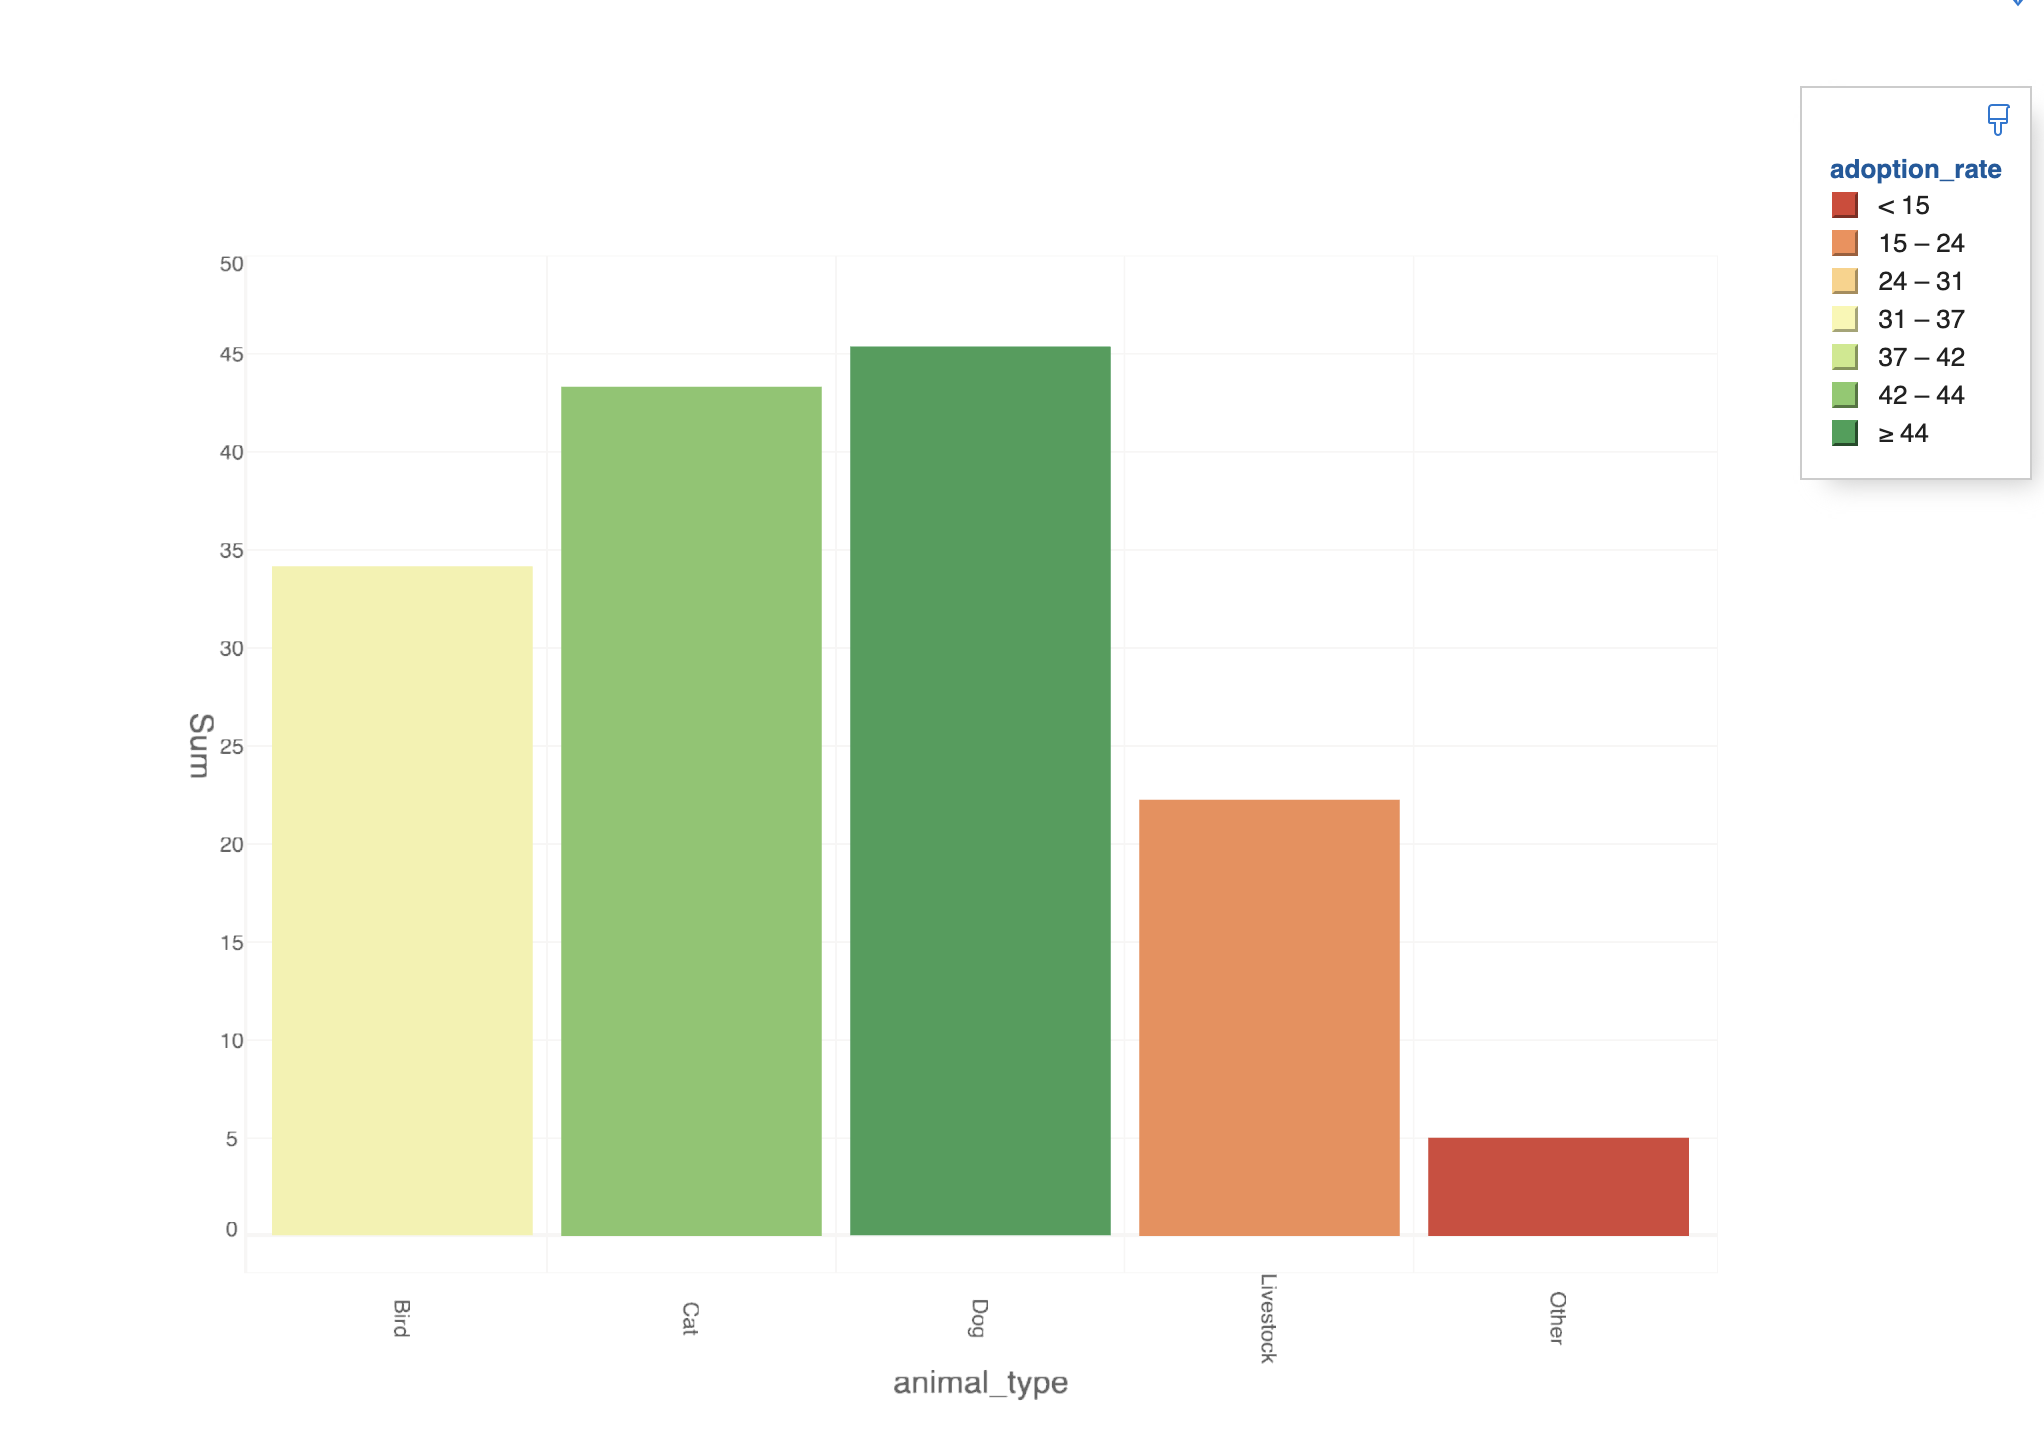

# Popular Adoption Months for Each Animal Type

- <span style="color: var(--text-primary); font-family: -apple-system, BlinkMacSystemFont, sans-serif;">The chart reveals the most favored adoption months for each animal type.</span>
- <span style="color: var(--text-primary); font-family: -apple-system, BlinkMacSystemFont, sans-serif;">January and December are peak adoption months for dogs.</span>
- <span style="color: var(--text-primary); font-family: -apple-system, BlinkMacSystemFont, sans-serif;">For cats is July and August.</span>
- Birds and Livestock is March.
- And "Other" is september.

In [19]:
use Selter_Outcomes
SELECT
    MONTH(datetime) AS adoption_month,
    animal_type,
    COUNT(*) AS total_adoption_count
FROM dbo.aac_shelter_outcomes
WHERE outcome_type = 'Adoption'
GROUP BY MONTH(datetime), animal_type
ORDER BY MONTH(datetime), animal_type;

(48 rows affected)

Total execution time: 00:00:00.136

adoption_month,animal_type,total_adoption_count
1,Bird,7
1,Cat,959
1,Dog,1957
1,Other,17
2,Cat,523
2,Dog,1595
2,Other,9
3,Bird,34
3,Cat,423
3,Dog,1457


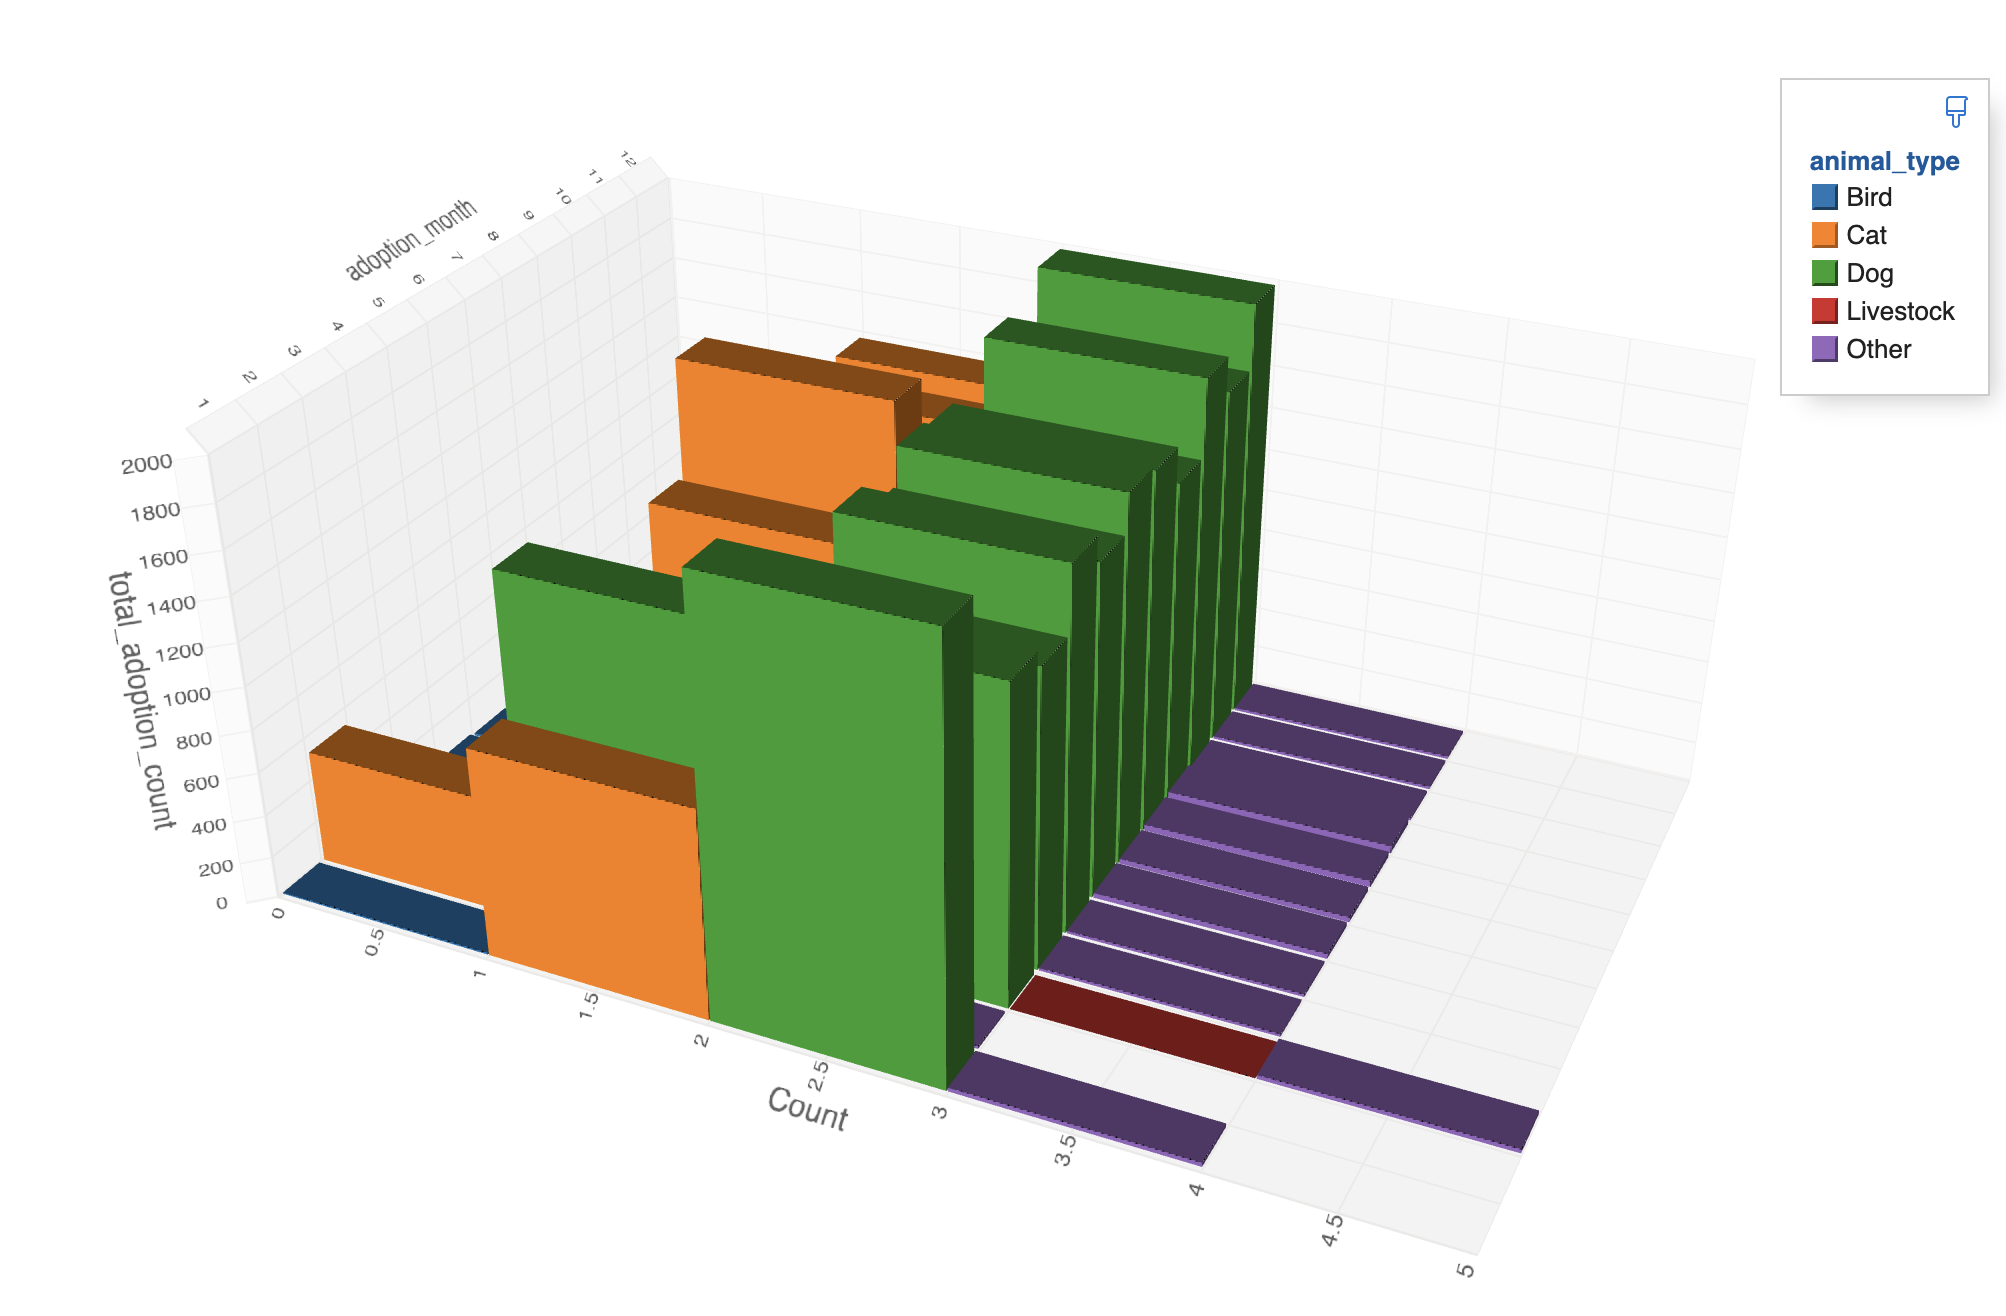

## Top 10 Breeds with Highest Adoption Rates for Dog

- <span style="color: var(--text-primary); font-family: Söhne, ui-sans-serif, system-ui, -apple-system, &quot;Segoe UI&quot;, Roboto, Ubuntu, Cantarell, &quot;Noto Sans&quot;, sans-serif, &quot;Helvetica Neue&quot;, Arial, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;, &quot;Segoe UI Symbol&quot;, &quot;Noto Color Emoji&quot;; font-size: 16px; white-space-collapse: preserve;">The shelter accommodates 1894 distinct dog breeds.</span>
- <span style="color: var(--text-primary); font-family: Söhne, ui-sans-serif, system-ui, -apple-system, &quot;Segoe UI&quot;, Roboto, Ubuntu, Cantarell, &quot;Noto Sans&quot;, sans-serif, &quot;Helvetica Neue&quot;, Arial, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;, &quot;Segoe UI Symbol&quot;, &quot;Noto Color Emoji&quot;; font-size: 16px; white-space-collapse: preserve;">Here are the top 10 most adopted dog breeds currently in the shelter.</span>

In [16]:
use Selter_Outcomes
SELECT TOP 10
    breed,
    COUNT(*) AS adoption_count,
    ROUND(COUNT(*) * 100.0 / (SELECT COUNT(*) FROM dbo.aac_shelter_outcomes WHERE animal_type = 'dog' 
    AND breed IS NOT NULL), 2) AS adoption_rate
FROM dbo.aac_shelter_outcomes
WHERE animal_type = 'dog' AND outcome_type = 'Adoption'
GROUP BY breed
ORDER BY adoption_count DESC;


(10 rows affected)

Total execution time: 00:00:00.214

breed,adoption_count,adoption_rate
Pit Bull Mix,2265,5.120000000000
Labrador Retriever Mix,2262,5.110000000000
Chihuahua Shorthair Mix,2219,5.020000000000
German Shepherd Mix,895,2.020000000000
Australian Cattle Dog Mix,587,1.330000000000
Dachshund Mix,388,0.880000000000
Border Collie Mix,343,0.780000000000
Boxer Mix,301,0.680000000000
Miniature Poodle Mix,270,0.610000000000
Catahoula Mix,248,0.560000000000


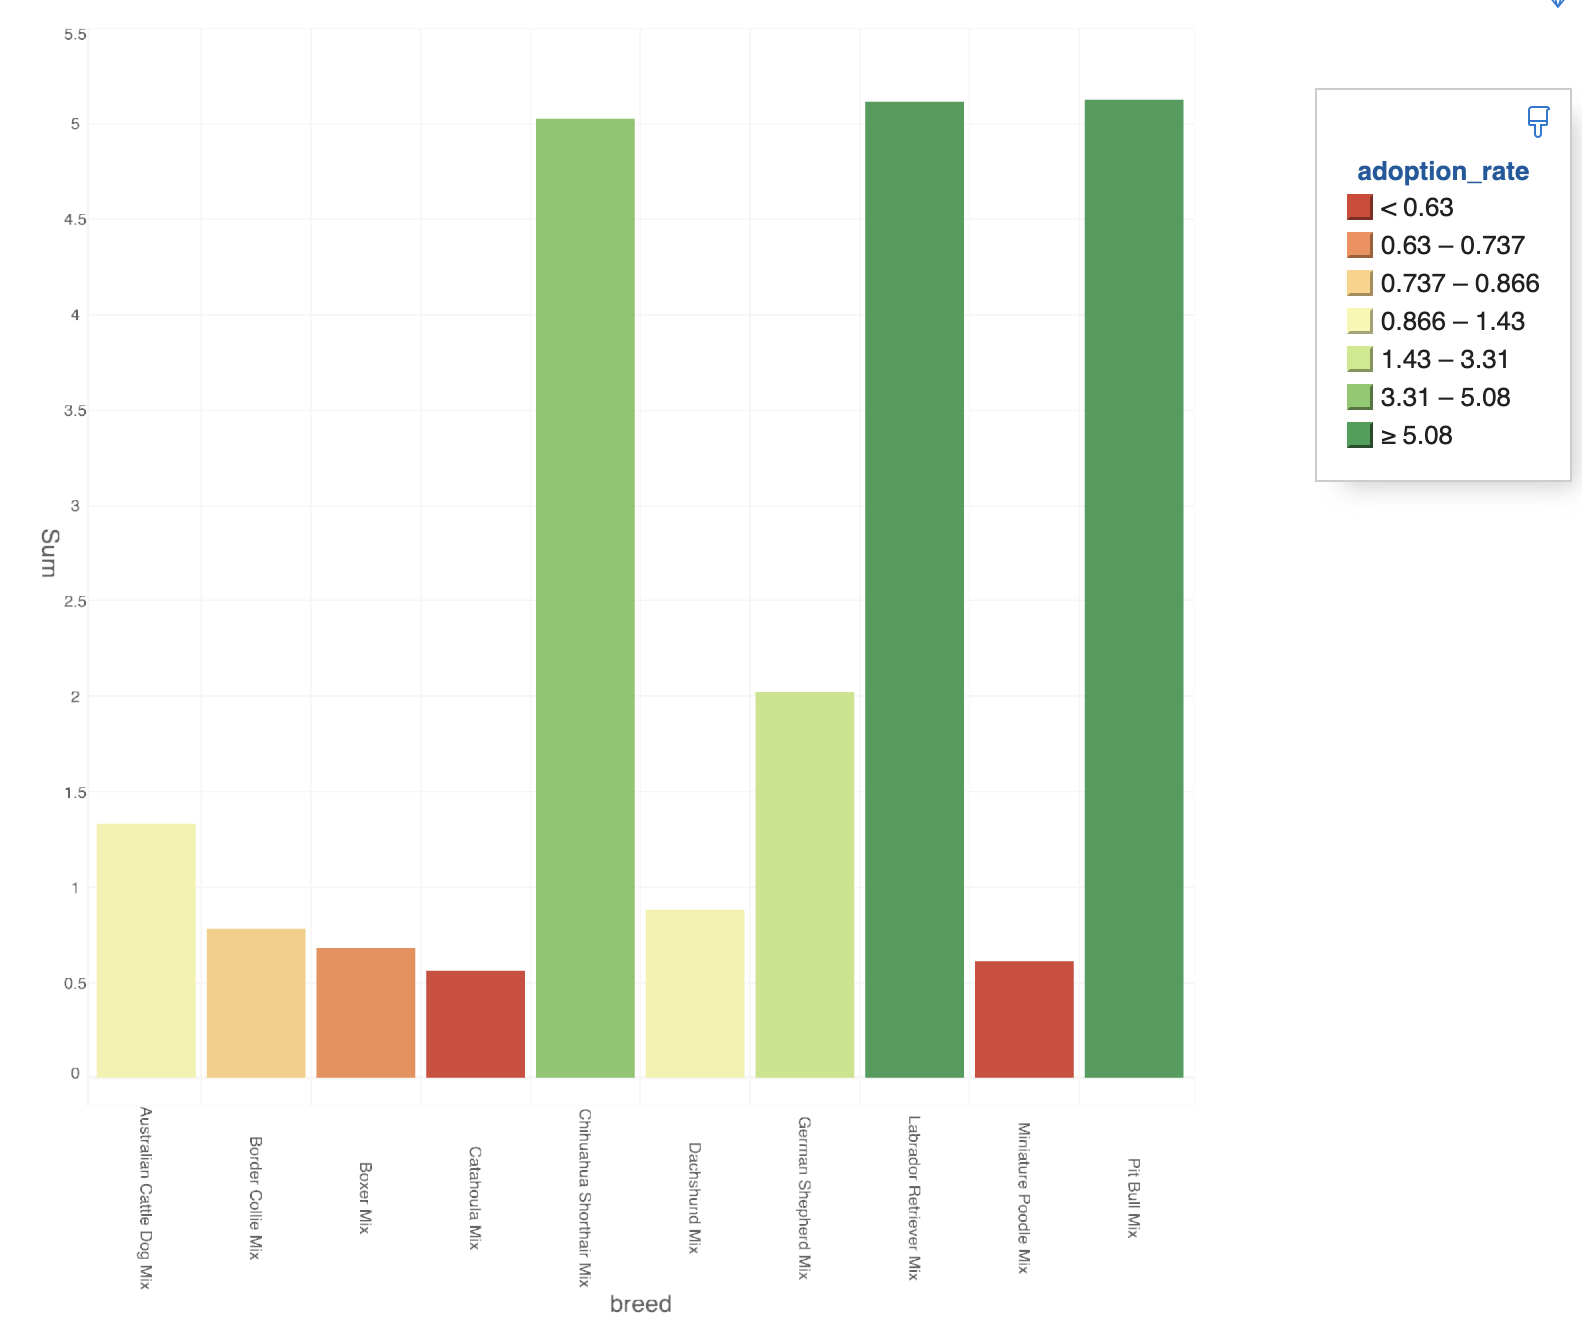

## Top 10 Breeds with Highest Adoption Rates for Cats

- <span style="color: var(--text-primary); font-family: -apple-system, BlinkMacSystemFont, sans-serif;">The shelter currently houses 84 unique cat breeds.</span>
- <span style="color: var(--text-primary); font-family: -apple-system, BlinkMacSystemFont, sans-serif;">Here are the top 10 most adopted dog breeds in the shelter.</span>

In [17]:
use Selter_Outcomes
SELECT TOP 10
    breed,
    COUNT(*) AS adoption_count,
    ROUND(COUNT(*) * 100.0 / (SELECT COUNT(*) FROM dbo.aac_shelter_outcomes WHERE animal_type = 'cat' 
    AND breed IS NOT NULL), 2) AS adoption_rate
FROM dbo.aac_shelter_outcomes
WHERE animal_type = 'cat' AND outcome_type = 'Adoption'
GROUP BY breed
ORDER BY adoption_count DESC;


(10 rows affected)

Total execution time: 00:00:00.214

breed,adoption_count,adoption_rate
Domestic Shorthair Mix,9901,33.650000000000
Domestic Medium Hair Mix,1052,3.580000000000
Domestic Longhair Mix,580,1.970000000000
Siamese Mix,461,1.570000000000
Domestic Shorthair,179,0.610000000000
American Shorthair Mix,77,0.260000000000
Snowshoe Mix,71,0.240000000000
Domestic Medium Hair,60,0.200000000000
Maine Coon Mix,58,0.200000000000
Manx Mix,45,0.150000000000


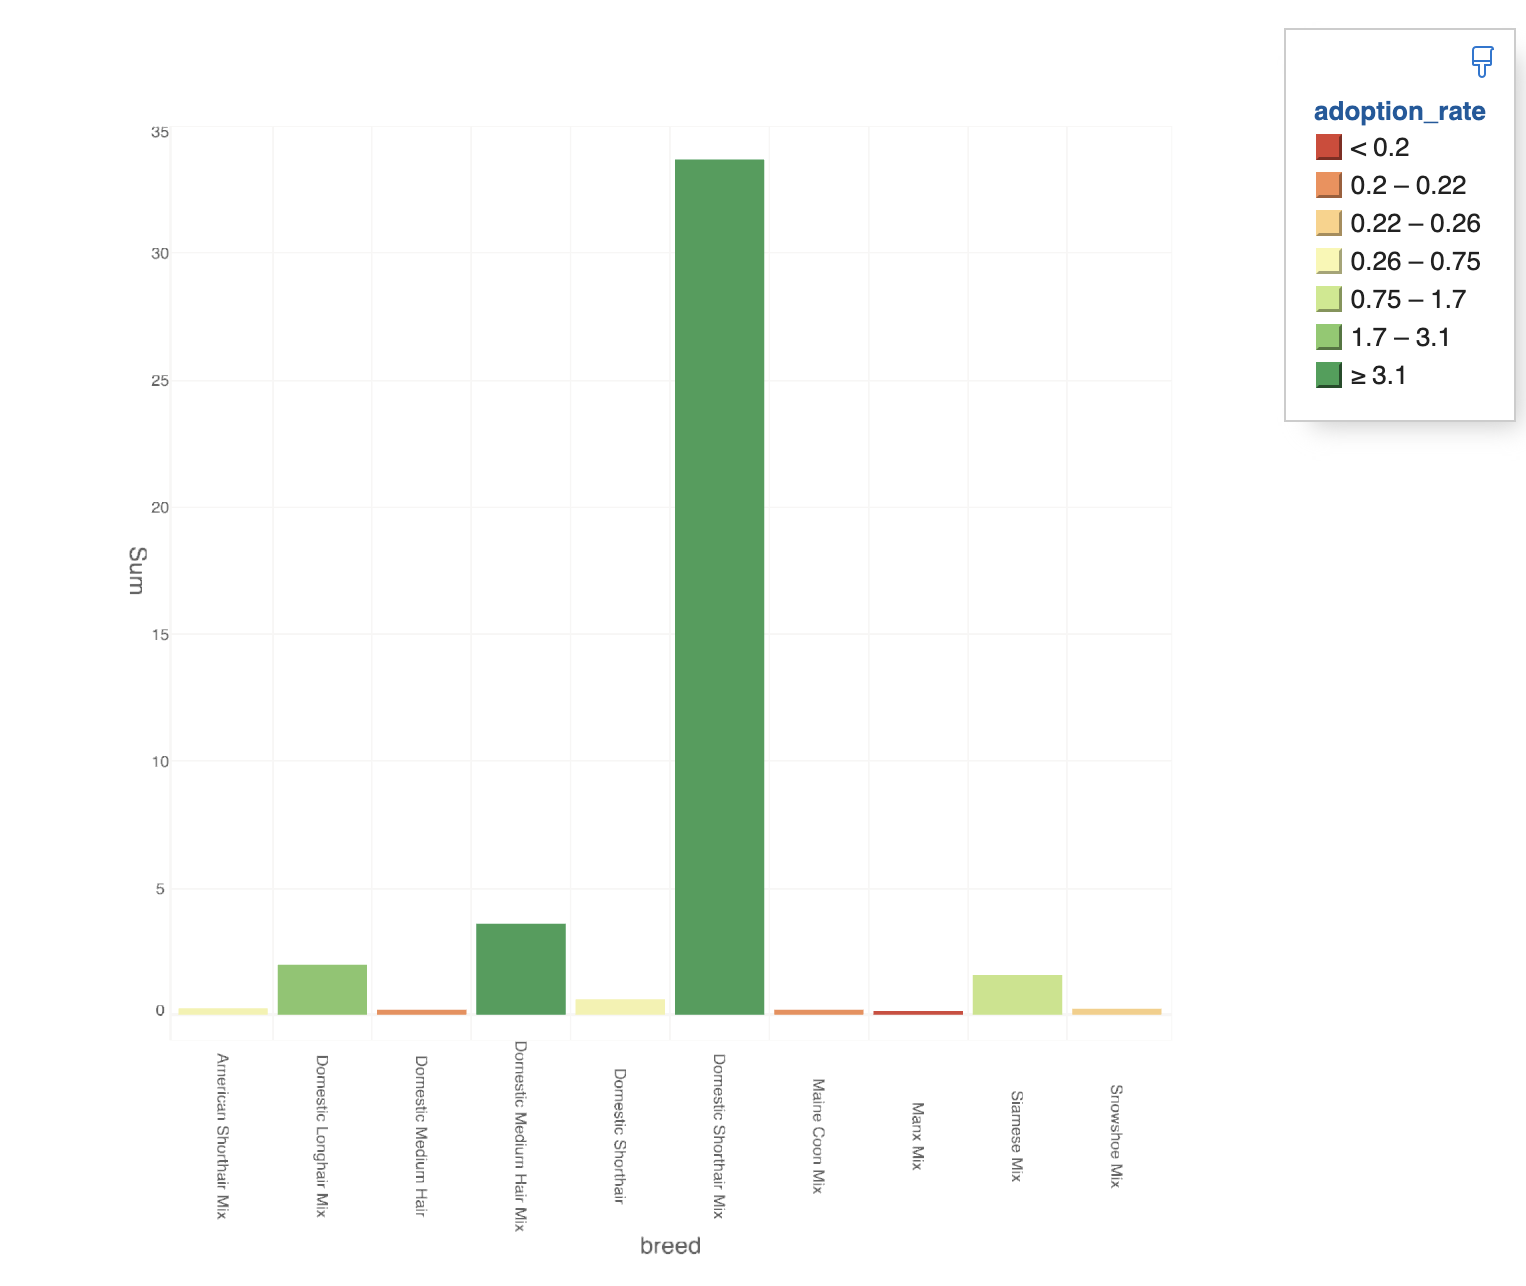

## Euthanasia Rates and Shelter Duration by Animal Type

- <span style="color: var(--text-primary); font-family: -apple-system, BlinkMacSystemFont, sans-serif;">Dogs have the lowest euthanasia rate but spend the longest time in the shelter, averaging over 1480 days.</span>
- <span style="color: var(--text-primary); font-family: -apple-system, BlinkMacSystemFont, sans-serif;">Conversely, other animal types, including foxes, squirrels, armadillos, rats, snakes, turtles, deer, and skunks, have the highest euthanasia rate but spend the least time in the shelter—less than 466 days on average.</span>
- <span style="color: var(--text-primary); font-family: -apple-system, BlinkMacSystemFont, sans-serif;">Livestock is missing from the graph because none of the shelter animal under that cyte category had been euthanies by the Austin Shelter.</span>

In [20]:
SELECT 
    animal_type,
    AVG(DATEDIFF(day, date_of_birth, datetime)) AS avg_days_in_shelter,
    COUNT(*) AS euthanasia_count,
    (COUNT(*) * 100.00) / 
    (
        SELECT COUNT(*) 
        FROM dbo.aac_shelter_outcomes
        WHERE animal_type = a.animal_type
    ) AS euthanasia_rate
FROM dbo.aac_shelter_outcomes a
WHERE outcome_type = 'Euthanasia'
GROUP BY animal_type;


(4 rows affected)

Total execution time: 00:00:00.162

animal_type,avg_days_in_shelter,euthanasia_count,euthanasia_rate
Cat,1186,1453,4.9384814084698
Bird,480,85,25.4491017964071
Dog,1709,1504,3.3994846525925
Other,455,3038,71.4991762767710


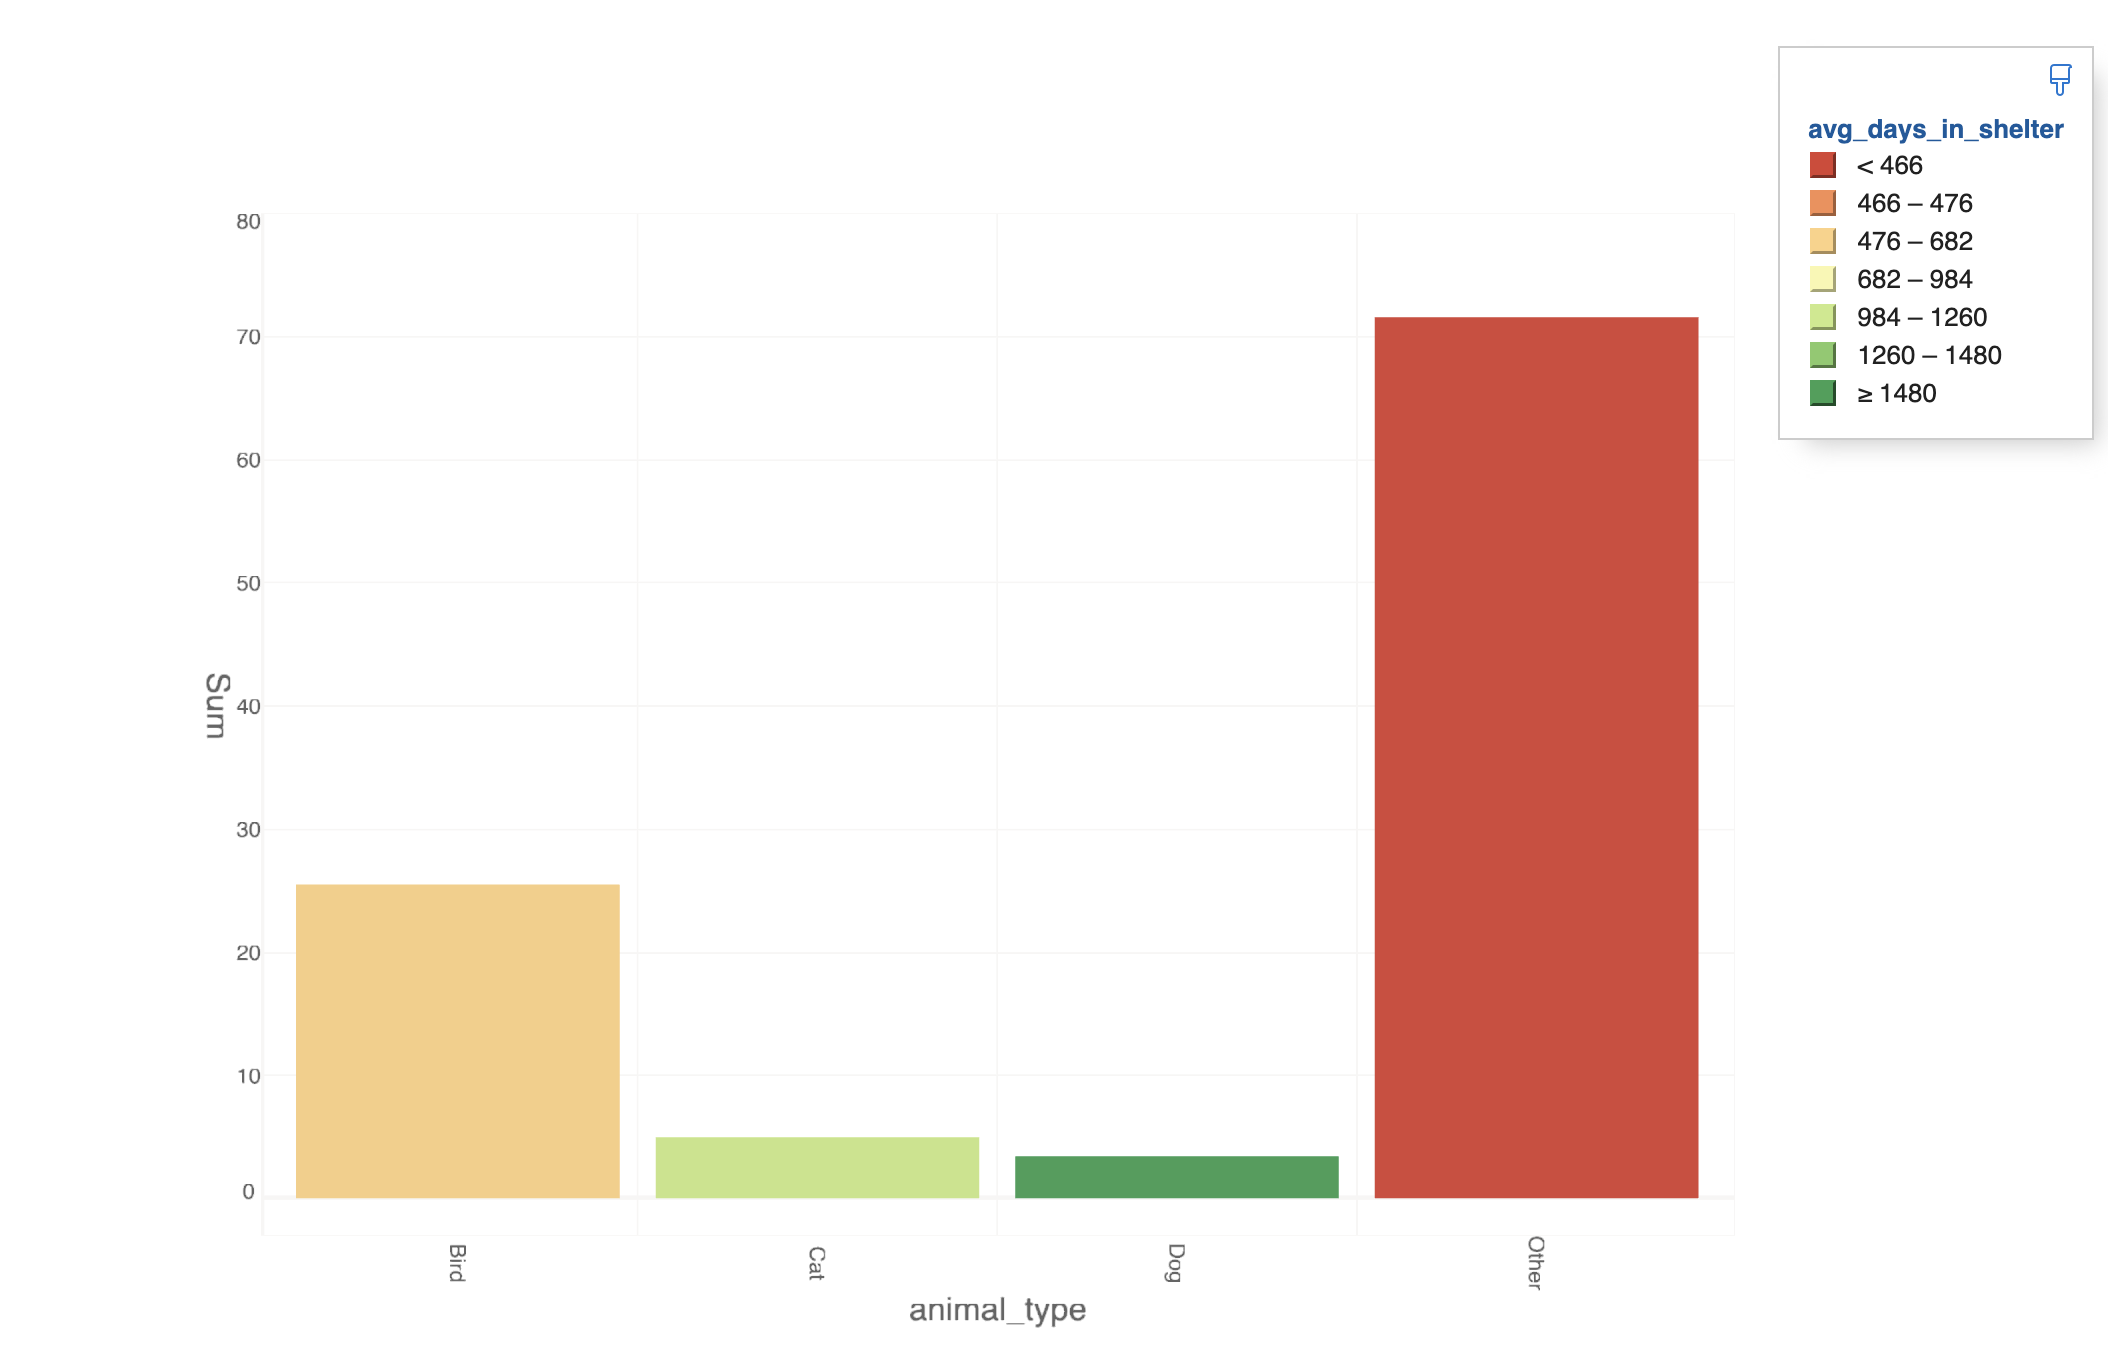